# PROJETO FINAL
INTRODUÇÂO AO PROCESSAMENTO DE IMAGENS


Prof. Bruno Luiggi Macchiavello Espinoza


- Lucas Corrêa Boaventura - 211038262

- Gustavo - 

## Bibliotecas

In [71]:
import numpy as np
from PIL import Image
from IPython.display import display
import cv2
import matplotlib.pyplot as plt

In [72]:
class my_DataSet():
    def __init__(self, *paths) -> None:
        self.__dataset = np.array([np.array(Image.open(path).resize((240, 240))) for path in paths])
        self.__names = np.array([path.split("/")[-1] for path in paths])
    
    def get(self, *i) -> np.array:
        return self.__dataset[i]
    
    def get_names(self, *i) -> np.array:
        return self.__names[i]
    
    def get_gray(self,*i) -> np.array:
        return np.array([cv2.cvtColor(arr, cv2.COLOR_RGB2GRAY) for arr in self.__dataset])[i]
    
    def show(self) -> None:
        for arr in self.__dataset:
            display(Image.fromarray(arr))

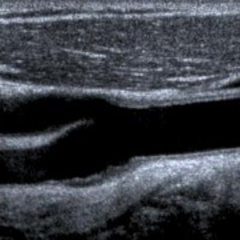

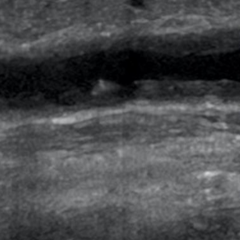

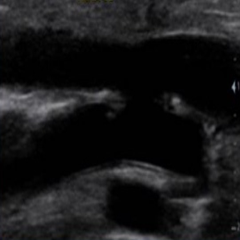

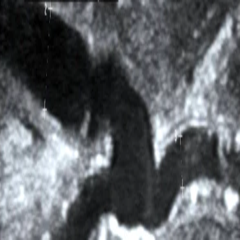

In [73]:
dataset = my_DataSet("./dataset/tatiana.png","./dataset/arteria_simples.jpg","./dataset/arteria_dupla.jpg", "./dataset/ponte_safena.png")
dataset.show()

## Thresholding

### Global

In [74]:
# img_low_filter = cv2.GaussianBlur(gray_img, (5, 5), 0)
# Image.fromarray(img_low_filter)

In [75]:
# histograma = cv2.calcHist([img_low_filter], [0], None, [256], [0, 256])
# plt.figure(figsize=(5, 3))
# plt.plot(histograma, color='black')
# plt.title('Imagem original')
# plt.xlabel('Intensidade de Cinza')
# plt.ylabel('Número de Pixels')
# plt.grid()
# plt.show()

Método OTSU


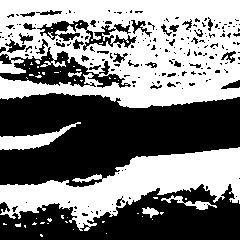

Método OTSU


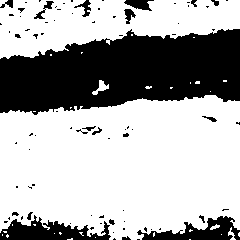

Método OTSU


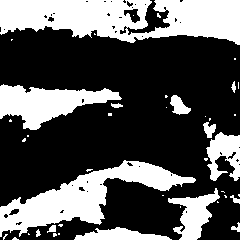

Método OTSU


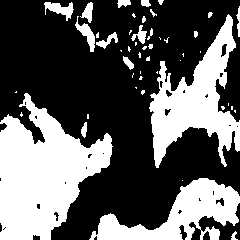

In [76]:
for gray_img in dataset.get_gray():
    _, img_bin = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # _, img_bin_dps_filtro = cv2.threshold(img_low_filter, 0, 255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)

    print("Método OTSU")
    display(Image.fromarray(img_bin))
    # print("Método OTSU após um filtro Gaussiano")
    # Image.fromarray(img_bin_dps_filtro)

### Local

tatiana.png


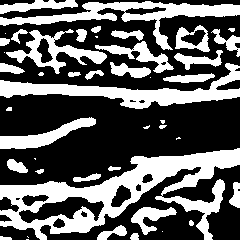

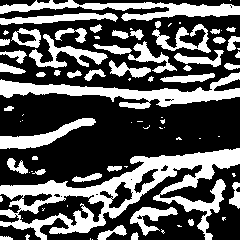

arteria_simples.jpg


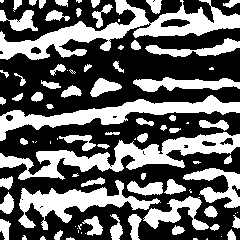

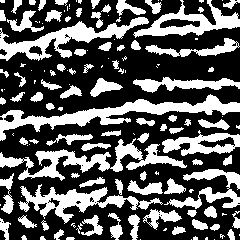

arteria_dupla.jpg


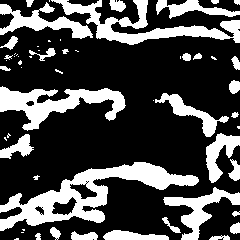

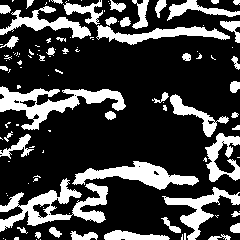

ponte_safena.png


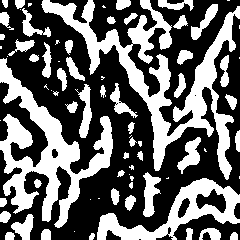

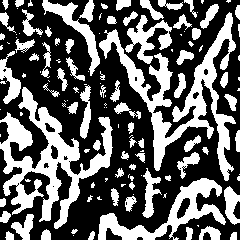

In [77]:
for i,gray_img in enumerate(dataset.get_gray()):
    blurred = cv2.GaussianBlur(gray_img, (15, 15), 0)

    thresh_mean = cv2.adaptiveThreshold(
        blurred, 
        255, 
        cv2.ADAPTIVE_THRESH_MEAN_C, 
        cv2.THRESH_BINARY , 
        19,  # Tamanho do bloco (área local)
        0    # Constante subtraída da média
    )

    # Aplicar Threshold Adaptativo - Método Gaussiano
    thresh_gaussian = cv2.adaptiveThreshold(
        blurred, 
        255, 
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 
        19,  # Tamanho do bloco (área local)
        0    # Constante subtraída da média ponderada
    )
    print(dataset.get_names(i))

    display(Image.fromarray(thresh_mean))
    display(Image.fromarray(thresh_gaussian))


## Watershed

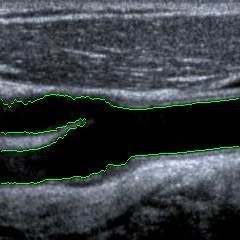

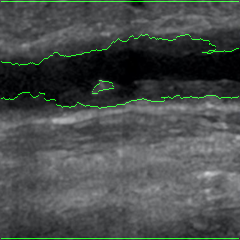

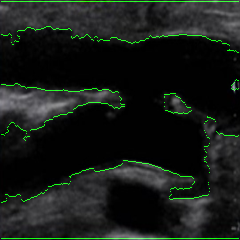

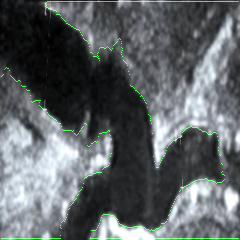

In [78]:
def kernel(shape=3) : return np.ones(shape, np.uint8)

manual_markers = [2,1,1,1]
for i, (array_orig,gray_img) in enumerate(zip(dataset.get(),dataset.get_gray())):
    # borrar e pegar threshold com OTSU
    blurred = cv2.GaussianBlur(gray_img, (15, 15), 0)
    (Image.fromarray(blurred))
    ret, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # pegar as regioes de certeza 
    sure_bg = cv2.dilate(thresh, kernel(), iterations=1)
    (Image.fromarray(sure_bg))

    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel(), iterations=2)
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 0)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    (Image.fromarray(sure_fg))


    unknown = cv2.subtract(sure_bg, sure_fg)
    (Image.fromarray(unknown))

    _, markers = cv2.connectedComponents(sure_fg)

    markers = markers + 1
    markers[unknown == 255] = 0
    markers = cv2.watershed(array_orig, markers)




    water_fill = np.zeros(array_orig.shape, dtype=np.uint8)
    water_fill[markers == manual_markers[i]] = [0,255,0] #selecionado manualmente a label que preencheu a area requerida

    erosion = cv2.erode(water_fill, kernel())
    contour = water_fill-erosion
    (Image.fromarray(contour))


    highlighted = cv2.addWeighted(array_orig, 1, contour,1, 0)
    display(Image.fromarray(highlighted))